In [38]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Наложение и удаление шума

In [39]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

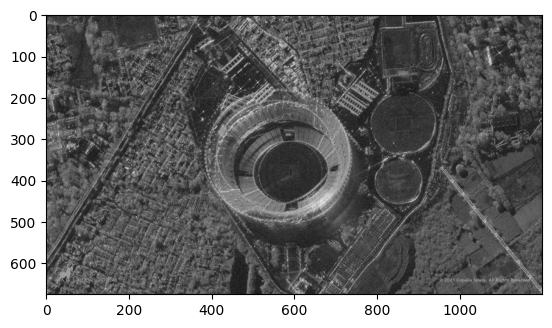

In [40]:
plt.imshow(image_gray, cmap="gray")

In [41]:
# Gaussian noise
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[  0,   0,   3, ...,   0,   0,   0],
       [  0,   0,   0, ...,  90,  10,   0],
       [ 21,   0,   0, ...,  85,   0,   0],
       ...,
       [  0,   0,  23, ...,  63,   0,  65],
       [  0, 217,   0, ..., 149,   0,  22],
       [121,   0, 183, ...,  31,   0,  97]],
      shape=(675, 1200), dtype=uint8)

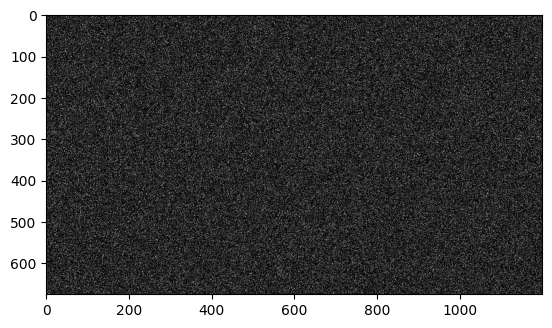

In [42]:
plt.imshow(noise_gauss, cmap="gray")

In [43]:
# Salt and pepper
noise =  np.random.randint(0, 101, size = (image_gray.shape[0], image_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)

In [44]:
bg_image = np.ones(image_gray.shape, np.uint8) * 128

In [45]:
bg_image[zeros_pixel] = 0
bg_image[ones_pixel] = 255

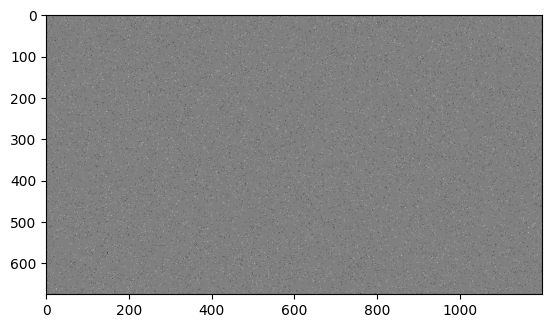

In [46]:
plt.imshow(bg_image, cmap="gray")

In [47]:
image_noise_gauss = cv2.add(image_gray,noise_gauss)

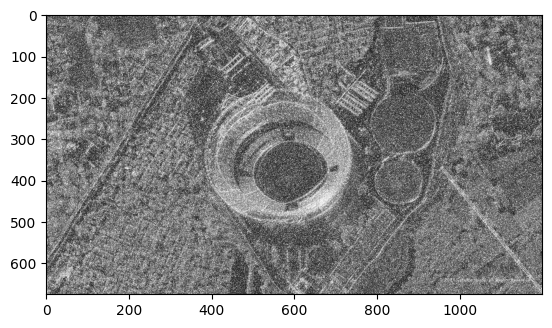

In [48]:
plt.imshow(image_noise_gauss, cmap="gray")

In [49]:
from skimage.metrics import structural_similarity, mean_squared_error
mse_gauss = mean_squared_error(image_gray, image_noise_gauss)
(ssim, diff) = structural_similarity(image_gray, image_noise_gauss, full=True)
print(mse_gauss, ssim)

4235.772919753086 0.1873182359752183


In [50]:
image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)

In [51]:
mse_gauss_median = mean_squared_error(image_gray, image_gauss_median)
(ssim_gauss_median, diff) = structural_similarity(image_gray,  image_gauss_median, full=True)

In [52]:
print(mse_gauss_median, ssim_gauss_median)

1036.6538777777778 0.4285539052509906


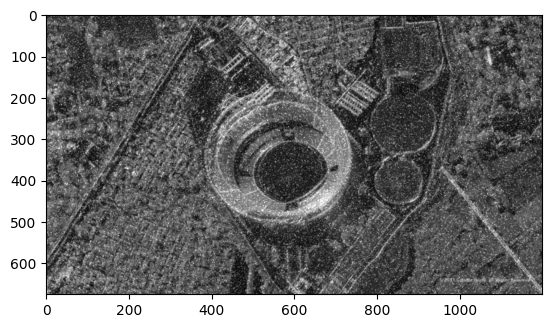

In [53]:
plt.imshow(image_gauss_median, cmap="gray")

In [54]:
import copy

image_sp = copy.deepcopy(image_gray)

image_sp[zeros_pixel] = 0
image_sp[ones_pixel] = 255

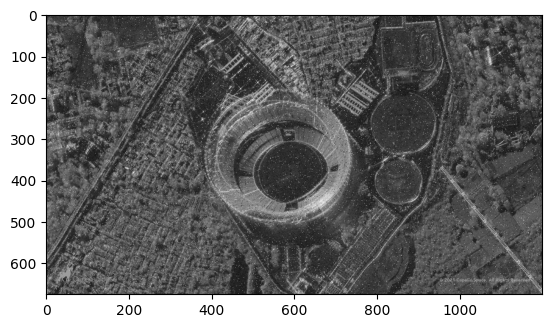

In [55]:
plt.imshow(image_sp, cmap="gray")

In [56]:
mse_sp = mean_squared_error(image_gray, image_sp)
(ssim_sp, diff) = structural_similarity(image_gray, image_sp, full=True)
print(mse_sp, ssim_sp)

386.68221975308643 0.7218131115338235


In [57]:
image_sp_median = cv2.medianBlur(image_sp, 3)

In [58]:
mse_sp_median = mean_squared_error(image_gray, image_sp_median)
(ssim_sp_median, diff) = structural_similarity(image_gray, image_sp_median, full=True)
print(mse_sp_median, ssim_sp_median)

95.64307530864197 0.8162143559216841


# Другие типы фильтров

In [59]:
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)

In [60]:
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss,9,75,75)

In [61]:
image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)

In [62]:
import math

def geom(a):
    prod = 1
    for i in range(a.shape[0]):
        prod1 = 1
        for j in range(a.shape[1]):
            prod1 *= a[i,j]
        prod1 = math.pow(prod1, 1.0/9.0)
        prod *= prod1
    return prod

def proc(img, filter):
    img_res = copy.deepcopy(img)
    for i in range(0,img.shape[0] -2):
        for j in range(0,img.shape[1] -2):
            img_res[i:i+3, j:j+3] = filter(img[i:i+3, j:j+3])
    return img_res
    
res = proc(image_noise_gauss, geom)


C:\Users\Admin\AppData\Local\Temp\ipykernel_14792\164976186.py:8: RuntimeWarning: overflow encountered in scalar multiply
  prod1 *= a[i,j]


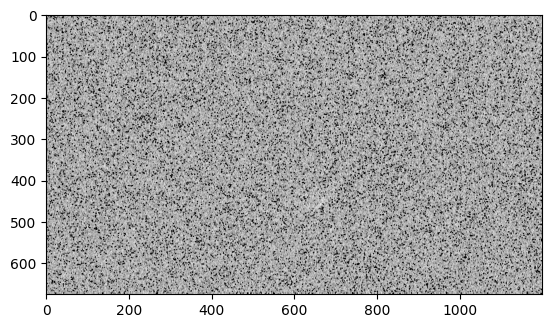

In [63]:
plt.imshow(res, cmap="gray")

In [64]:
mse_geom = mean_squared_error(image_gray, res)
(ssim_geom, diff) = structural_similarity(image_gray, res, full=True)
print(mse_geom, ssim_geom)

6551.136404938272 0.027478899134296495



# 2D свертка

In [65]:
# averaging filter
kernel_5 = np.ones((5,5),np.float32)/25
image_k5 = cv2.filter2D(image_gray,-1,kernel_5)
# blured_image = cv2.blur(img,(5,5))
image_b5 = cv2.blur(image_gray,(5,5))

In [66]:
mse_kb = mean_squared_error(image_k5, image_b5)
(ssim_kb, diff) = structural_similarity(image_k5, image_b5, full=True)
print(mse_kb, ssim_kb)

0.0 1.0


In [67]:
# Laplasian
kernel_lapl = np.array([[0,-10,0],
                        [-10,40,-10],
                        [0,-10,0]], np.float32)

In [68]:
image_lapl = cv2.filter2D(image_gray,-1,kernel_lapl) 

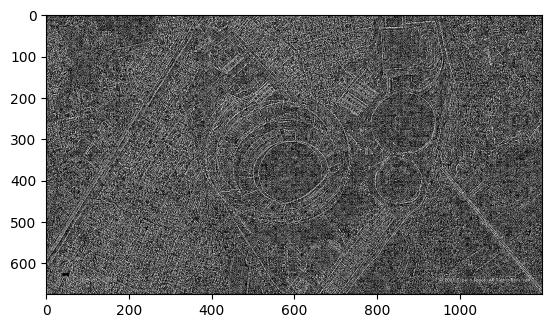

In [69]:
plt.imshow(image_lapl, cmap="gray")

In [70]:
# ДЗ 2
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

In [71]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
import pandas as pd

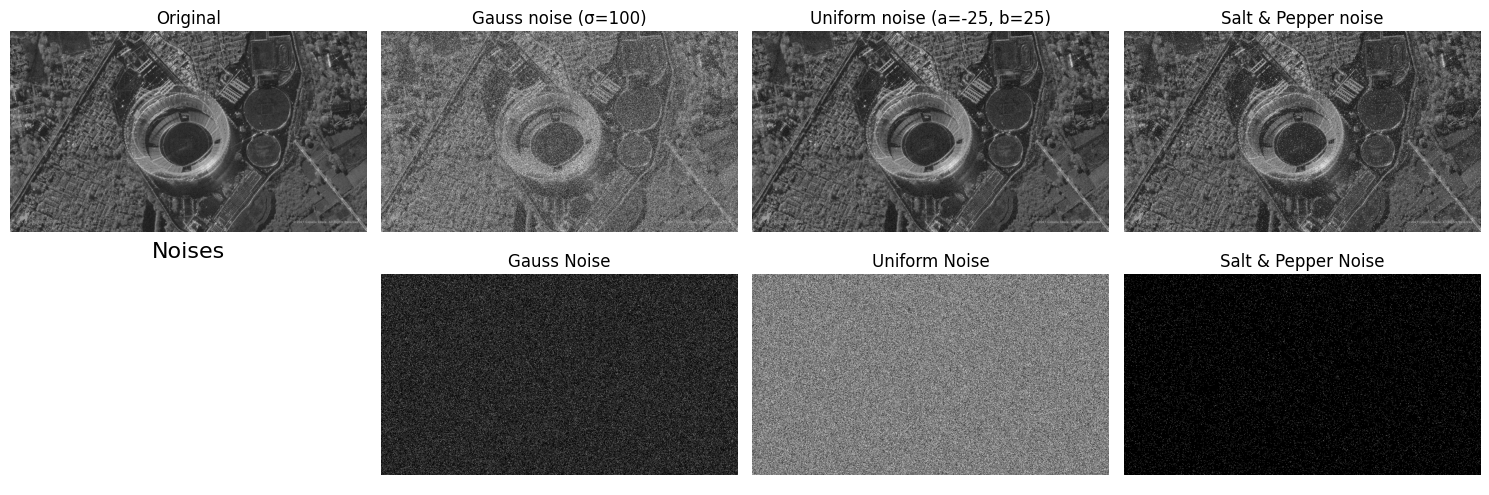

Original vs Original with gauss noise.
	PSNR: 12.87, SSIM: 0.1701
Original vs Original with uniform noise.
	PSNR: 24.94, SSIM: 0.6997
Original vs Original with salt & pepper noise.
	PSNR: 18.28, SSIM: 0.4817


In [72]:
# Зашумить изображение при помощи шума гаусса, постоянного шума.

# Функция для оценки качества изображений
def evaluate_filter(original, filtered):
    psnr = peak_signal_noise_ratio(original, filtered)
    ssim = structural_similarity(original, filtered)
    return psnr, ssim

# Загрузка и подготовка изображения
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Сохранение зашумленных изображений
images_noise = {}

fig, axes = plt.subplots(2, 4, figsize=(15, 5))

axes[0, 0].imshow(image_gray, cmap='gray')
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

axes[1, 0].set_title('Noises', fontsize=16, pad=5)
axes[1, 0].axis('off')

# Создание гауссовского шума
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

axes[1, 1].imshow(noise_gauss, cmap='gray')
axes[1, 1].set_title('Gauss Noise')
axes[1, 1].axis('off')

# Создание равномерного шума
a, b = -25, 25
noise_uniform = np.random.uniform(a, b, image_gray.shape)
axes[1, 2].imshow(noise_uniform, cmap='gray')
axes[1, 2].set_title('Uniform Noise')
axes[1, 2].axis('off')

# Создание шума "соль и перец"
prob = 0.05  # 5% пикселей будут заменены на шум
noise_salt_pepper = np.zeros(image_gray.shape, np.uint8)

# Добавление "перца" (черные точки)
num_pepper = int(prob * image_gray.size * 0.5)
coords_pepper = [np.random.randint(0, i, num_pepper) for i in image_gray.shape]
noise_salt_pepper[coords_pepper[0], coords_pepper[1]] = 255  # Белый для визуализации шума

# Добавление "соли" (белые точки)
num_salt = int(prob * image_gray.size * 0.5)
coords_salt = [np.random.randint(0, i, num_salt) for i in image_gray.shape]
noise_salt_pepper[coords_salt[0], coords_salt[1]] = 0  # Черный для визуализации шума

axes[1, 3].imshow(noise_salt_pepper, cmap='gray')
axes[1, 3].set_title('Salt & Pepper Noise')
axes[1, 3].axis('off')

# Оригинал + гауссовский шум
image_noise_gauss = np.clip(image_gray + noise_gauss, 0, 255).astype(np.uint8)
images_noise[f'Gauss noise (σ={stddev})'] = image_noise_gauss

# Оригинал + равномерный шум
image_noise_uniform = np.clip(image_gray + noise_uniform, 0, 255).astype(np.uint8)
images_noise[f'Uniform noise (a={a}, b={b})'] = image_noise_uniform

# Оригинал + шум "соль и перец"
image_noise_salt_pepper = image_gray.copy().astype(np.uint8)

# Создаем маску для черных и белых точек
pepper_mask = np.zeros_like(image_gray, dtype=bool)
salt_mask = np.zeros_like(image_gray, dtype=bool)

pepper_mask[coords_pepper[0], coords_pepper[1]] = True
salt_mask[coords_salt[0], coords_salt[1]] = True

# Применяем шум
image_noise_salt_pepper[pepper_mask] = 0    # Черные точки
image_noise_salt_pepper[salt_mask] = 255    # Белые точки

images_noise['Salt & Pepper noise'] = image_noise_salt_pepper

# Отображение зашумленных изображений
for col, key in enumerate(images_noise, start=1):
    axes[0, col].imshow(images_noise[key], cmap='gray')
    axes[0, col].set_title(key)
    axes[0, col].axis('off')

plt.tight_layout()
plt.show()

print("Original vs Original with gauss noise.")
print("\tPSNR: {0:.2f}, SSIM: {1:.4f}".format(*evaluate_filter(image_gray, image_noise_gauss)))
print("Original vs Original with uniform noise.")
print("\tPSNR: {0:.2f}, SSIM: {1:.4f}".format(*evaluate_filter(image_gray, image_noise_uniform)))
print("Original vs Original with salt & pepper noise.")
print("\tPSNR: {0:.2f}, SSIM: {1:.4f}".format(*evaluate_filter(image_gray, image_noise_salt_pepper)))

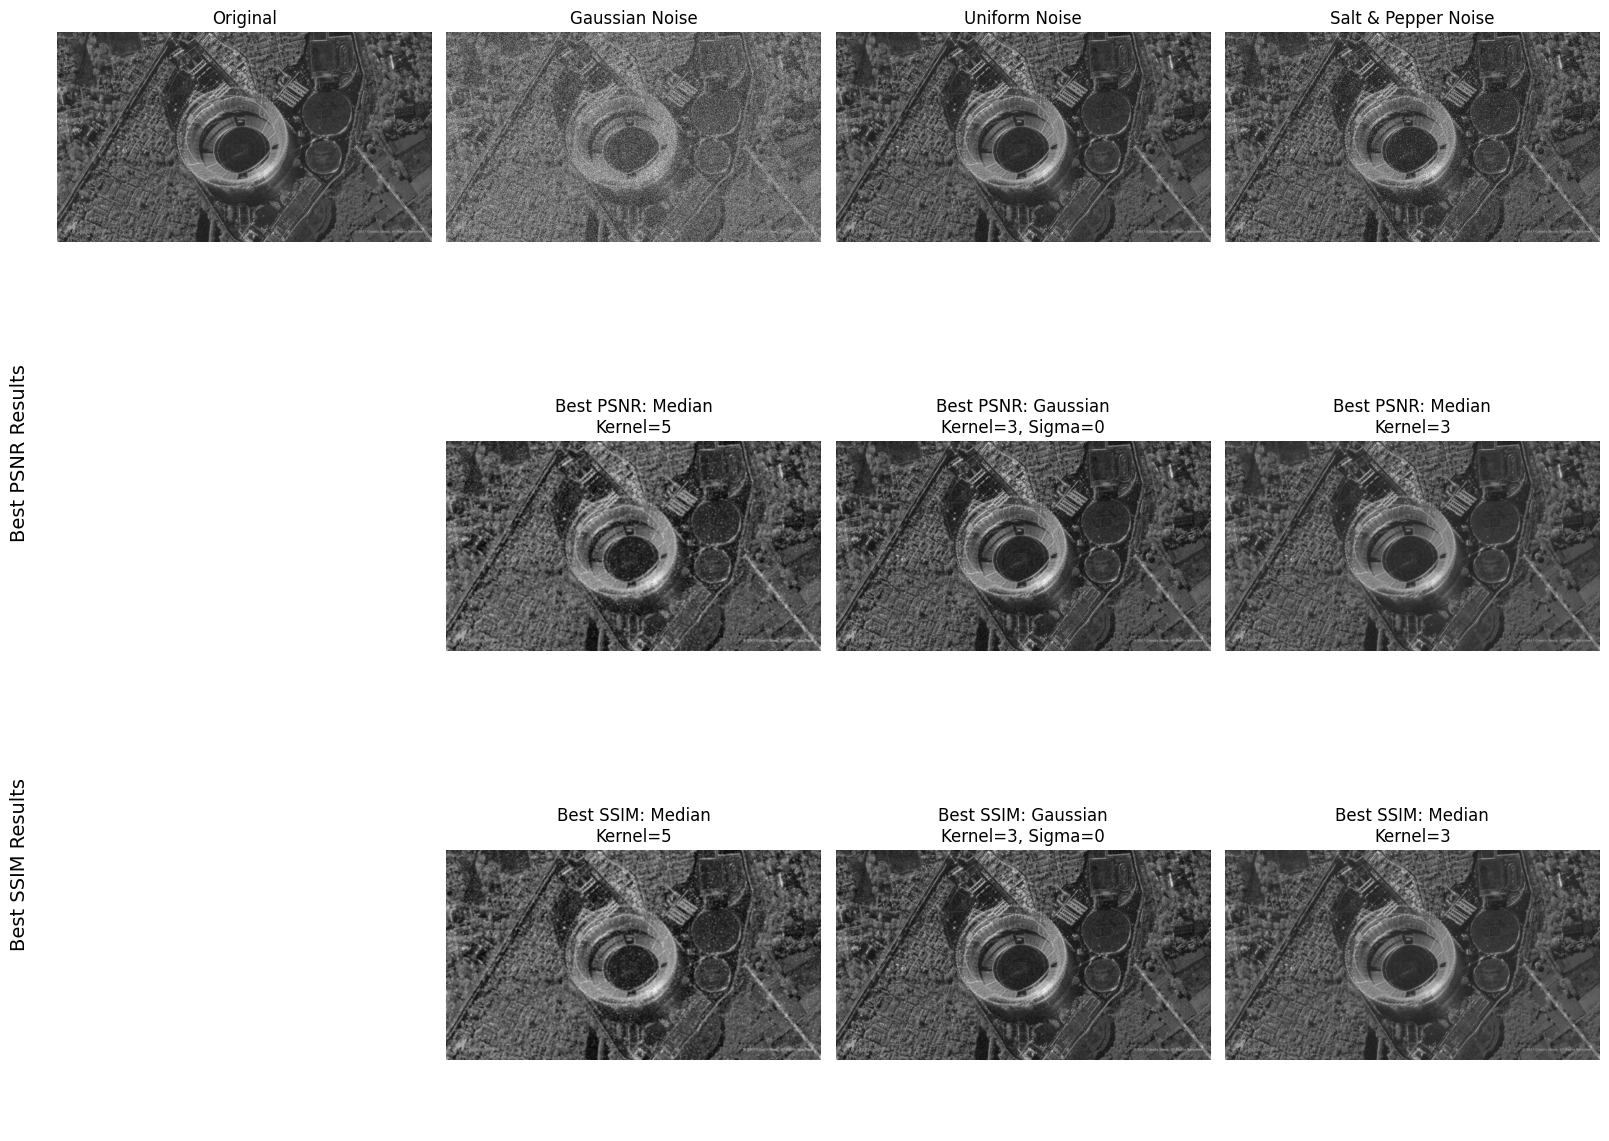

Результаты фильтрации (топ-5 для каждого типа шума по PSNR):

Gaussian Noise:
   Filter                   Parameters      PSNR     SSIM
   Median                     Kernel=5 21.128189 0.489437
   Median                     Kernel=7 21.096331 0.442091
   Median                     Kernel=3 19.622944 0.465627
Bilateral d=15, σColor=100, σSpace=100 17.732044 0.331143
Bilateral d=15, σColor=150, σSpace=150 17.666505 0.345557

Uniform Noise:
  Filter        Parameters      PSNR     SSIM
Gaussian Kernel=3, Sigma=0 28.447999 0.817186
Gaussian Kernel=5, Sigma=1 27.414398 0.774350
Gaussian Kernel=5, Sigma=0 27.131889 0.759498
  Median          Kernel=3 26.440017 0.714517
     NLM              h=10 26.224725 0.762243

Salt & Pepper Noise:
  Filter        Parameters      PSNR     SSIM
  Median          Kernel=3 28.148831 0.811561
Gaussian Kernel=5, Sigma=1 25.254251 0.670751
  Median          Kernel=5 25.219586 0.631707
Gaussian Kernel=5, Sigma=0 25.218984 0.664239
Gaussian Kernel=3, Sigma=0 24.

In [76]:
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.

# Определяем функции фильтров с различными параметрами
def apply_median_filter(img, kernel_size):
    return cv2.medianBlur(img, kernel_size)

def apply_gaussian_filter(img, kernel_size, sigma):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), sigma)

def apply_bilateral_filter(img, d, sigma_color, sigma_space):
    return cv2.bilateralFilter(img, d, sigma_color, sigma_space)

def apply_nlm_filter(img, h):
    return cv2.fastNlMeansDenoising(img, h=h)

# Параметры для тестирования
median_params = [3, 5, 7]
gaussian_params = [(3, 0), (5, 0), (5, 1), (7, 1.5)]
bilateral_params = [(9, 75, 75), (15, 100, 100), (15, 150, 150)]
nlm_params = [10, 20, 30]

# Создаем словарь с зашумленными изображениями для удобства
noisy_images = {
    'Gaussian': image_noise_gauss,
    'Uniform': image_noise_uniform,
    'Salt & Pepper': image_noise_salt_pepper
}

# Тестирование фильтров
results = []

for noise_type, noisy_img in noisy_images.items():
    # Медианный фильтр
    for ksize in median_params:
        filtered = apply_median_filter(noisy_img, ksize)
        psnr, ssim = evaluate_filter(image_gray, filtered)
        results.append({
            'Noise Type': noise_type,
            'Filter': 'Median',
            'Parameters': f'Kernel={ksize}',
            'PSNR': psnr,
            'SSIM': ssim,
            'Image': filtered
        })
    
    # Фильтр Гаусса
    for ksize, sigma in gaussian_params:
        filtered = apply_gaussian_filter(noisy_img, ksize, sigma)
        psnr, ssim = evaluate_filter(image_gray, filtered)
        results.append({
            'Noise Type': noise_type,
            'Filter': 'Gaussian',
            'Parameters': f'Kernel={ksize}, Sigma={sigma}',
            'PSNR': psnr,
            'SSIM': ssim,
            'Image': filtered
        })
    
    # Билатеральный фильтр
    for d, sigma_color, sigma_space in bilateral_params:
        filtered = apply_bilateral_filter(noisy_img, d, sigma_color, sigma_space)
        psnr, ssim = evaluate_filter(image_gray, filtered)
        results.append({
            'Noise Type': noise_type,
            'Filter': 'Bilateral',
            'Parameters': f'd={d}, σColor={sigma_color}, σSpace={sigma_space}',
            'PSNR': psnr,
            'SSIM': ssim,
            'Image': filtered
        })
    
    # Фильтр нелокальных средних
    for h in nlm_params:
        filtered = apply_nlm_filter(noisy_img, h)
        psnr, ssim = evaluate_filter(image_gray, filtered)
        results.append({
            'Noise Type': noise_type,
            'Filter': 'NLM',
            'Parameters': f'h={h}',
            'PSNR': psnr,
            'SSIM': ssim,
            'Image': filtered
        })

# Создаем DataFrame с результатами
df_results = pd.DataFrame(results)

# Находим лучшие фильтры для каждого типа шума по PSNR и SSIM
best_filters = {}
for noise_type in noisy_images.keys():
    df_noise = df_results[df_results['Noise Type'] == noise_type]
    best_psnr = df_noise.loc[df_noise['PSNR'].idxmax()]
    best_ssim = df_noise.loc[df_noise['SSIM'].idxmax()]
    best_filters[noise_type] = {'PSNR': best_psnr, 'SSIM': best_ssim}

# Визуализация результатов (исправленная версия без крайнего столбца)
fig, axes = plt.subplots(3, 4, figsize=(16, 12))

# Отображаем исходное и зашумленные изображения
axes[0, 0].imshow(image_gray, cmap='gray')
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

# Отображаем зашумленные изображения
for i, (noise_type, noisy_img) in enumerate(noisy_images.items(), 1):
    axes[0, i].imshow(noisy_img, cmap='gray')
    axes[0, i].set_title(f'{noise_type} Noise')
    axes[0, i].axis('off')

# Отображаем лучшие результаты фильтрации для каждого типа шума
for i, noise_type in enumerate(noisy_images.keys()):
    best_psnr = best_filters[noise_type]['PSNR']
    best_ssim = best_filters[noise_type]['SSIM']
    
    axes[1, i+1].imshow(best_psnr['Image'], cmap='gray')
    axes[1, i+1].set_title(f'Best PSNR: {best_psnr["Filter"]}\n{best_psnr["Parameters"]}')
    axes[1, i+1].axis('off')
    
    axes[2, i+1].imshow(best_ssim['Image'], cmap='gray')
    axes[2, i+1].set_title(f'Best SSIM: {best_ssim["Filter"]}\n{best_ssim["Parameters"]}')
    axes[2, i+1].axis('off')

# Добавляем заголовки для строк
axes[1, 0].set_title('Best PSNR Results', fontsize=14, rotation=90, x=-0.1, y=0.5)
axes[2, 0].set_title('Best SSIM Results', fontsize=14, rotation=90, x=-0.1, y=0.5)
axes[1, 0].axis('off')
axes[2, 0].axis('off')

# Скрываем последний столбец (индекс 3) во второй и третьей строках
axes[1, 3].axis('off')
axes[2, 3].axis('off')

plt.tight_layout()
plt.show()

# Выводим таблицу с результатами
print("Результаты фильтрации (топ-5 для каждого типа шума по PSNR):")
for noise_type in noisy_images.keys():
    print(f"\n{noise_type} Noise:")
    df_noise = df_results[df_results['Noise Type'] == noise_type]
    df_sorted = df_noise.sort_values('PSNR', ascending=False).head(5)
    print(df_sorted[['Filter', 'Parameters', 'PSNR', 'SSIM']].to_string(index=False))

# Анализ результатов
print("\nАнализ результатов:")
for noise_type in noisy_images.keys():
    best_psnr = best_filters[noise_type]['PSNR']
    best_ssim = best_filters[noise_type]['SSIM']
    
    print(f"\nДля {noise_type} шума:")
    print(f"Лучший фильтр по PSNR: {best_psnr['Filter']} с параметрами {best_psnr['Parameters']}")
    print(f"Лучший фильтр по SSIM: {best_ssim['Filter']} с параметрами {best_ssim['Parameters']}")